In [1]:
import cairo
import cv2
from math import pi
import random
import math
from PIL import Image
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

In [2]:
def polar_to_cart(theta, dist):
    
    x = 1 + dist * math.cos(theta)
    y = 1 + dist * math.sin(theta)
    
    return x,y

t = math.pi/180.0

def remap(old_val, old_min, old_max, new_min, new_max):
    return (new_max - new_min)*(old_val - old_min) / (old_max - old_min) + new_min

def draw(geno):
    
    
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 100, 100)
    ctx = cairo.Context(surface)
    ctx.set_antialias(cairo.Antialias.NONE)
    ctx.scale(50, 50)
    # Paint the background
    ctx.set_source_rgb(0, 0 , 0)
    ctx.paint()

    r1 = remap(geno[8], 0, 1,0.1, 1)
    r2 = remap(geno[9], 0, 1,0.1, 1)
    r3 = remap(geno[10], 0, 1,0.1, 1)
    r4 = remap(geno[11], 0, 1,0.1, 1)
    r5 = remap(geno[12], 0, 1,0.1, 1)
    r6 = remap(geno[13], 0, 1,0.1, 1)
    r7 = remap(geno[14], 0, 1,0.1, 1)
    r8 = remap(geno[15], 0, 1,0.1, 1)

    # Draw the image
    firstx, firsty = polar_to_cart((0 + geno[0])*45*t, r1)
    secondx, secondy = polar_to_cart((1 + geno[1])*45*t, r2)
    thirdx, thirdy = polar_to_cart((2 + geno[2])*45*t, r3)
    forthx, forthy = polar_to_cart((3 + geno[3])*45*t, r4)
    fifthx, fifthy = polar_to_cart((4 + geno[4])*45*t, r5)
    sixthx, sixthy = polar_to_cart((5 + geno[5])*45*t, r6)
    seventhx, seventhy = polar_to_cart((6 + geno[6])*45*t, r7)
    eigthx, eigthy = polar_to_cart((7 + geno[7])*45*t, r8)
    ctx.move_to(firstx, firsty)

    ctx.line_to(secondx, secondy)
    ctx.line_to(thirdx, thirdy)
    ctx.line_to(forthx, forthy)
    ctx.line_to(fifthx, fifthy)
    ctx.line_to(sixthx, sixthy)
    ctx.line_to(seventhx, seventhy)
    ctx.line_to(eigthx, eigthy)
    
    ctx.close_path()
    ctx.set_source_rgb(1, 1, 1)
    ctx.fill_preserve()
    

    return surface

In [3]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points

centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
geno_avg3 = data_avg3[:, 5: 21]
all_imgs_avg3 = []
for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg3.append(flat1)    
    
np.set_printoptions(threshold=np.inf)
#print(all_imgs_avg3[10])

In [4]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points


centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
geno_avg3 = data_avg3[:, 5: 21]
all_imgs_avg3 = []
for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg3.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_avg3 = t_sne.fit_transform(all_imgs_avg3)

centroids_avg7 = load_centroids("centroids_avg7.dat")
data_avg7 = np.loadtxt("archive_avg7.dat")
fit_avg7 = data_avg7[:,0:1]
geno_avg7 = data_avg7[:, 5: 21]
all_imgs_avg7 = []
for j in range(0, fit_avg7.shape[0]):    
    img1 = draw(geno_avg7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg7.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_avg7 = t_sne.fit_transform(all_imgs_avg7)

centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
geno_standard = data_standard[:, 5: 21]
all_imgs_standard = []
for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_standard.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_standard = t_sne.fit_transform(all_imgs_standard)

centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
geno_myversion3 = data_myversion3[:, 5: 21]
all_imgs_myversion3 = []
for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion3.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_myversion3 = t_sne.fit_transform(all_imgs_myversion3)

centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
geno_myversion7 = data_myversion7[:, 5: 21]
all_imgs_myversion7 = []
for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion7.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_myversion7 = t_sne.fit_transform(all_imgs_myversion7)

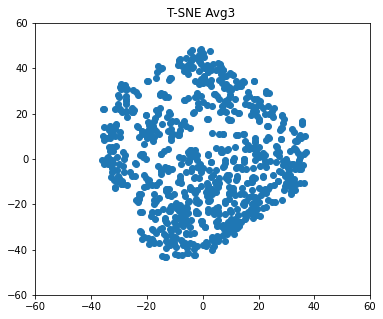

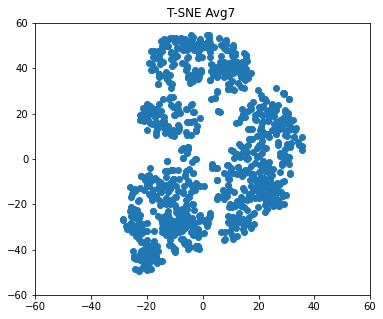

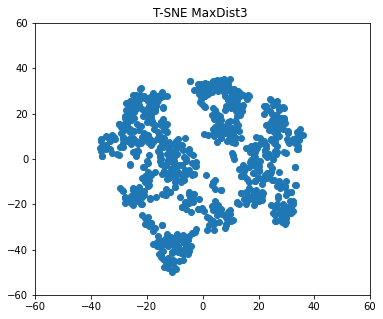

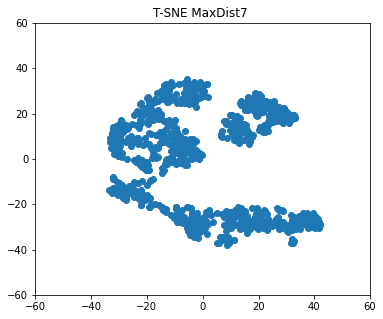

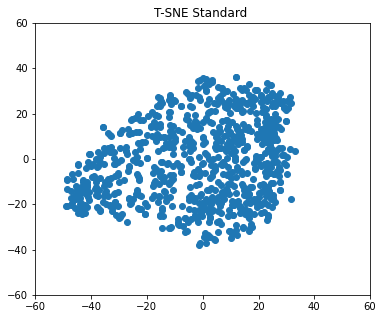

In [8]:
plt.figure(figsize=(6,5))
plt.title("T-SNE Avg3 ")
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.scatter(embed_avg3[:,0], embed_avg3[:,1])
plt.savefig("T-SNE Avg3 ")
plt.show()

plt.figure(figsize=(6,5))
plt.title("T-SNE Avg7 ")
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.scatter(embed_avg7[:,0], embed_avg7[:,1])
plt.savefig("T-SNE Avg7 ")
plt.show()


plt.figure(figsize=(6,5))
plt.title("T-SNE MaxDist3 ")
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.scatter(embed_myversion3[:,0], embed_myversion3[:,1])
plt.savefig("T-SNE MaxDist3 ")
plt.show()


plt.figure(figsize=(6,5))
plt.title("T-SNE MaxDist7 ")
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.scatter(embed_myversion7[:,0], embed_myversion7[:,1])
plt.savefig("T-SNE MaxDist7 ")
plt.show()


plt.figure(figsize=(6,5))
plt.title("T-SNE Standard ")
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.scatter(embed_standard[:,0], embed_standard[:,1])
plt.savefig("T-SNE Standard ")
plt.show()


In [9]:
centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
geno_avg3 = data_avg3[:, 5: 21]
all_imgs_avg3 = []
for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg3.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_avg3 = t_sne.fit_transform(all_imgs_avg3)

centroids_avg7 = load_centroids("centroids_avg7.dat")
data_avg7 = np.loadtxt("archive_avg7.dat")
fit_avg7 = data_avg7[:,0:1]
geno_avg7 = data_avg7[:, 5: 21]
all_imgs_avg7 = []
for j in range(0, fit_avg7.shape[0]):    
    img1 = draw(geno_avg7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg7.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_avg7 = t_sne.fit_transform(all_imgs_avg7)

centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
geno_standard = data_standard[:, 5: 21]
all_imgs_standard = []
for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_standard.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_standard = t_sne.fit_transform(all_imgs_standard)

centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
geno_myversion3 = data_myversion3[:, 5: 21]
all_imgs_myversion3 = []
for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion3.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_myversion3 = t_sne.fit_transform(all_imgs_myversion3)

centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
geno_myversion7 = data_myversion7[:, 5: 21]
all_imgs_myversion7 = []
for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion7.append(flat1)  
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_myversion7 = t_sne.fit_transform(all_imgs_myversion7)

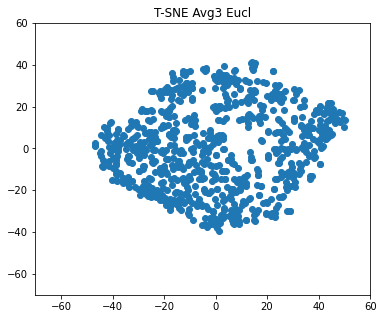

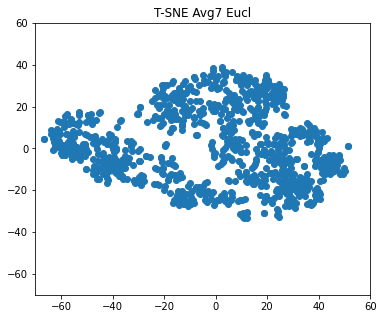

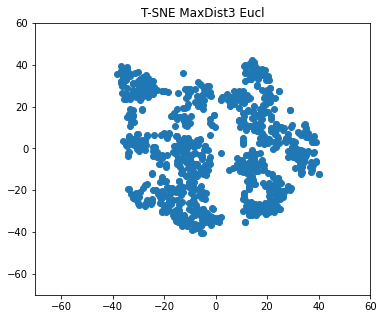

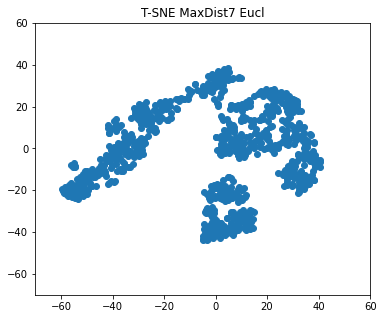

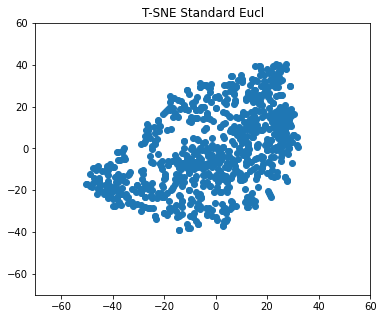

In [11]:
plt.figure(figsize=(6,5))
plt.title("T-SNE Avg3 Eucl")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_avg3[:,0], embed_avg3[:,1])
plt.savefig("T-SNE Avg3 Eucl")
plt.show()

plt.figure(figsize=(6,5))
plt.title("T-SNE Avg7 Eucl")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_avg7[:,0], embed_avg7[:,1])
plt.savefig("T-SNE Avg7 Eucl")
plt.show()


plt.figure(figsize=(6,5))
plt.title("T-SNE MaxDist3 Eucl")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_myversion3[:,0], embed_myversion3[:,1])
plt.savefig("T-SNE MaxDist3 Eucl")
plt.show()


plt.figure(figsize=(6,5))
plt.title("T-SNE MaxDist7 Eucl")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_myversion7[:,0], embed_myversion7[:,1])
plt.savefig("T-SNE MaxDist7 Eucl")
plt.show()


plt.figure(figsize=(6,5))
plt.title("T-SNE Standard Eucl")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_standard[:,0], embed_standard[:,1])
plt.savefig("T-SNE Standard Eucl")
plt.show()

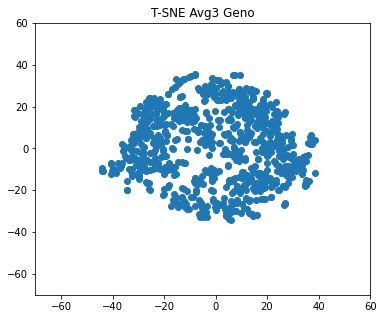

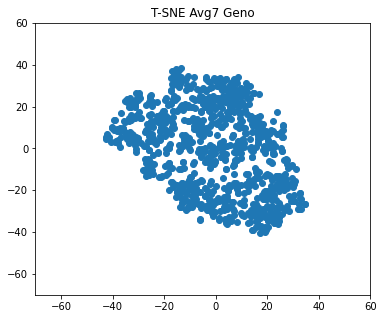

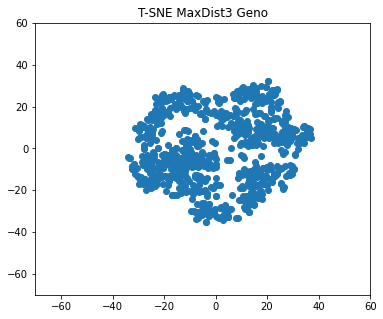

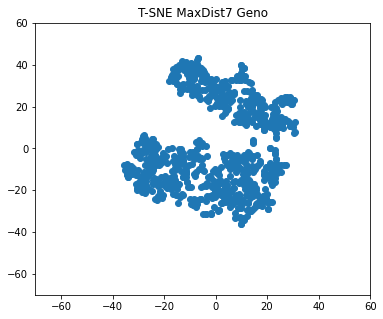

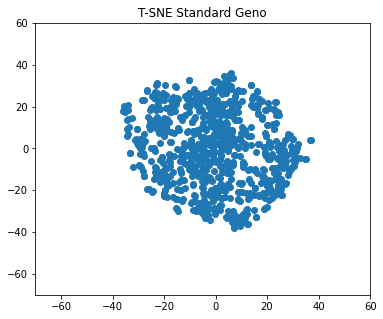

In [19]:
#t-sne genotype
embed_genoavg3 = t_sne.fit_transform(geno_avg3)
plt.figure(figsize=(6,5))
plt.title("T-SNE Avg3 Geno")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_genoavg3[:,0], embed_genoavg3[:,1])
plt.savefig("T-SNE Avg3 Geno")
plt.show()

embed_genoavg7 = t_sne.fit_transform(geno_avg7)
plt.figure(figsize=(6,5))
plt.title("T-SNE Avg7 Geno")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_genoavg7[:,0], embed_genoavg7[:,1])
plt.savefig("T-SNE Avg7 Geno")
plt.show()

embed_genomaxdist3 = t_sne.fit_transform(geno_myversion3)
plt.figure(figsize=(6,5))
plt.title("T-SNE MaxDist3 Geno")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_genomaxdist3[:,0], embed_genomaxdist3[:,1])
plt.savefig("T-SNE MaxDist3 Geno")
plt.show()

embed_genomaxdist7 = t_sne.fit_transform(geno_myversion7)
plt.figure(figsize=(6,5))
plt.title("T-SNE MaxDist7 Geno")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_genomaxdist7[:,0], embed_genomaxdist7[:,1])
plt.savefig("T-SNE MaxDist7 Geno")
plt.show()

embed_genostandard = t_sne.fit_transform(geno_standard)
plt.figure(figsize=(6,5))
plt.title("T-SNE Standard Geno")
plt.xlim(-70, 60)
plt.ylim(-70, 60)
plt.scatter(embed_genostandard[:,0], embed_genostandard[:,1])
plt.savefig("T-SNE Standard Geno")
plt.show()